# Ten Armed Bandit simulations
In this notebook we will simulate the 10 armed bandit problem. We will compare the performance of different action selection methods.

In [6]:
from ten_armed_testbed import Bandit, simulate, do_run
import matplotlib.pyplot as plt
import numpy as np

In [7]:
%matplotlib inline

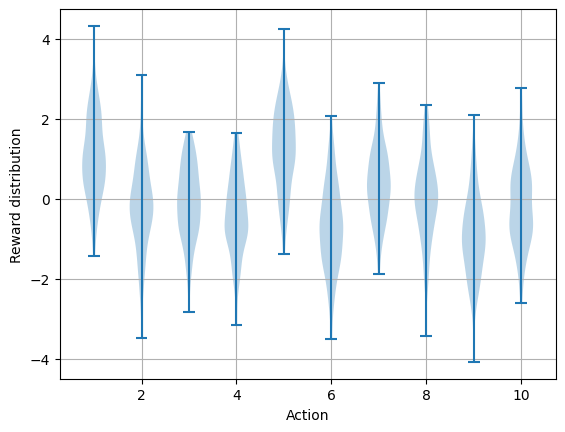

In [12]:
plt.violinplot(dataset=np.random.randn(200, 10) + np.random.randn(10))
plt.xlabel("Action")
plt.grid()
plt.ylabel("Reward distribution");

## Comparing epsilon-greedy strategies

2000 runs for 3 bandits.


100%|██████████| 3/3 [00:06<00:00,  2.24s/it]


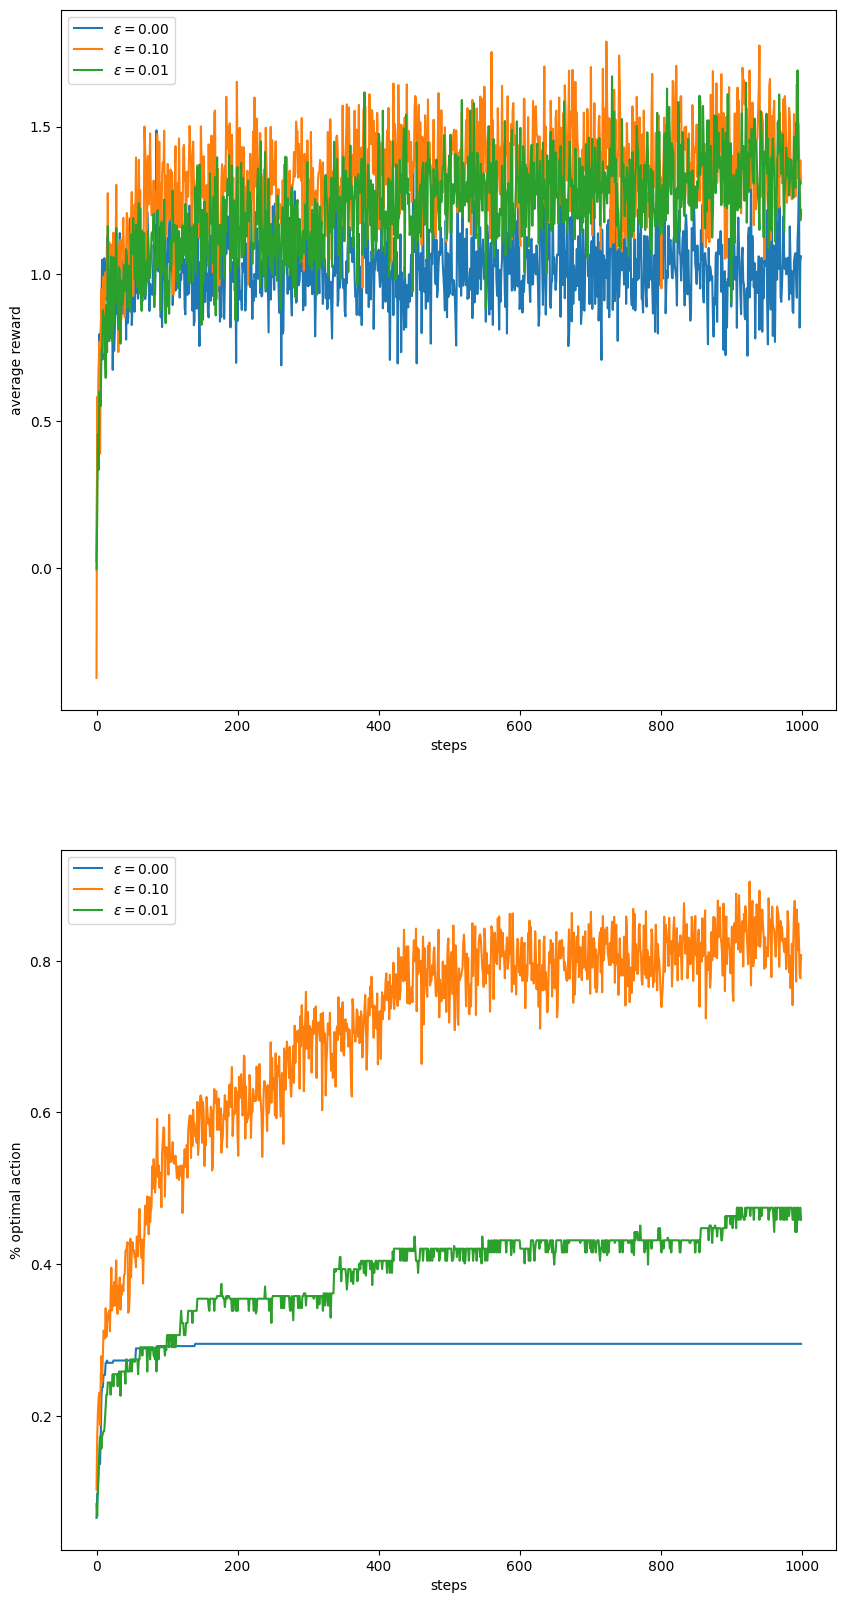

In [13]:
epsilons = [0, 0.1, 0.01]
runs = 2000 # number of runs
time = 1000 # number of time steps
bandits = [Bandit(epsilon=eps, sample_averages=True) for eps in epsilons]
best_action_counts, rewards = simulate(runs, time, bandits)

plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
for eps, rewards in zip(epsilons, rewards):
    plt.plot(rewards, label=r'$\epsilon = %.02f$' % (eps))
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
for eps, counts in zip(epsilons, best_action_counts):
    plt.plot(counts, label=r'$\epsilon = %.02f$' % (eps))
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend();

## Comparing optimistic initial values

2000 runs for 2 bandits.


100%|██████████| 2/2 [00:04<00:00,  2.26s/it]


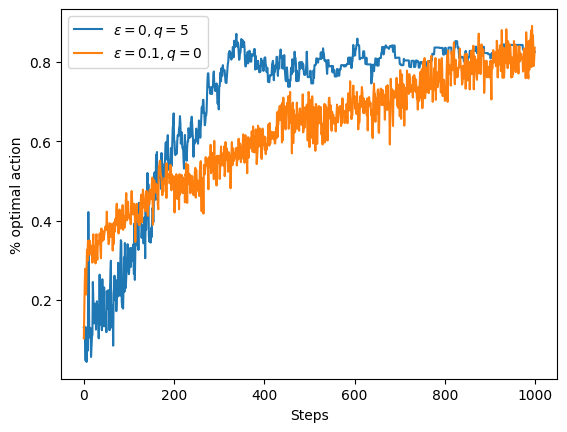

In [14]:
runs = 2000 # number of runs
time = 1000 # number of time steps
bandits = []
bandits.append(Bandit(epsilon=0, initial=5, step_size=0.1))
bandits.append(Bandit(epsilon=0.1, initial=0, step_size=0.1))
best_action_counts, _ = simulate(runs, time, bandits)

plt.plot(best_action_counts[0], label=r'$\epsilon = 0, q = 5$')
plt.plot(best_action_counts[1], label=r'$\epsilon = 0.1, q = 0$')
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend();

## Comparing UCB with epsilon-greedy

2000 runs for 2 bandits.


100%|██████████| 2/2 [00:05<00:00,  2.80s/it]


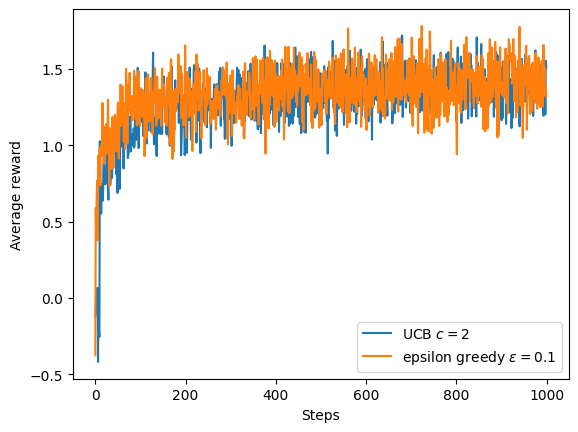

In [17]:
runs = 2000 # number of runs
time = 1000 # number of time steps
bandits = []
bandits.append(Bandit(epsilon=0, UCB_param=2, sample_averages=True))
bandits.append(Bandit(epsilon=0.1, sample_averages=True))
_, average_rewards = simulate(runs, time, bandits)

plt.plot(average_rewards[0], label='UCB $c = 2$')
plt.plot(average_rewards[1], label=r'epsilon greedy $\epsilon = 0.1$')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend();

## Comparing gradient bandit algorithms

1000 runs for 4 bandits.


100%|██████████| 4/4 [00:07<00:00,  1.82s/it]


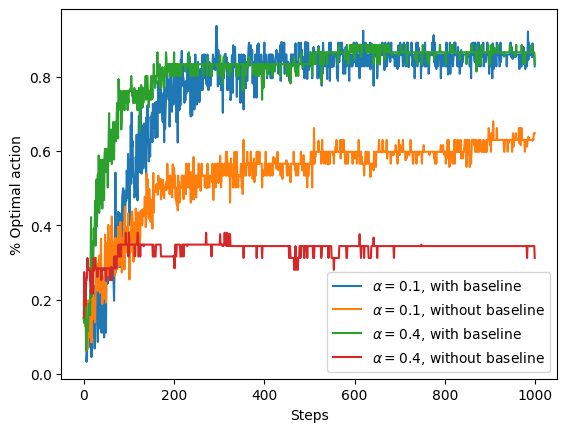

In [18]:
runs = 1000 # number of runs
time = 1000 # number of time steps
bandits = []
bandits.append(Bandit(gradient=True, step_size=0.1, gradient_baseline=True, true_reward=4))
bandits.append(Bandit(gradient=True, step_size=0.1, gradient_baseline=False, true_reward=4))
bandits.append(Bandit(gradient=True, step_size=0.4, gradient_baseline=True, true_reward=4))
bandits.append(Bandit(gradient=True, step_size=0.4, gradient_baseline=False, true_reward=4))
best_action_counts, _ = simulate(runs, time, bandits)
labels = [r'$\alpha = 0.1$, with baseline',
          r'$\alpha = 0.1$, without baseline',
          r'$\alpha = 0.4$, with baseline',
          r'$\alpha = 0.4$, without baseline']

for i in range(len(bandits)):
    plt.plot(best_action_counts[i], label=labels[i])
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend();

## Comparing all the methods

2000 runs for 25 bandits.


100%|██████████| 25/25 [01:10<00:00,  2.82s/it]


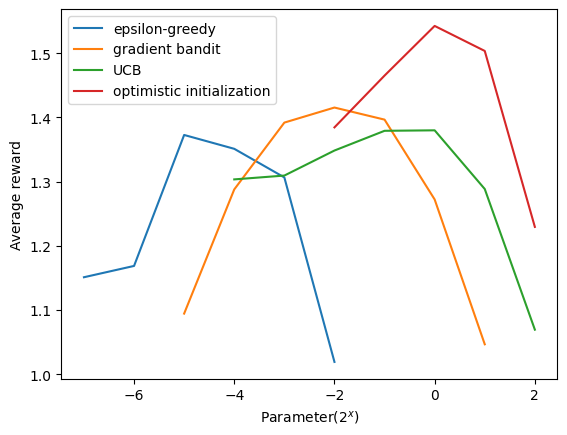

In [20]:
runs = 2000 # number of runs
time = 1000 # number of time steps
labels = ['epsilon-greedy', 'gradient bandit',
              'UCB', 'optimistic initialization']
generators = [lambda epsilon: Bandit(epsilon=epsilon, sample_averages=True),
              lambda alpha: Bandit(gradient=True, step_size=alpha, gradient_baseline=True),
              lambda coef: Bandit(epsilon=0, UCB_param=coef, sample_averages=True),
              lambda initial: Bandit(epsilon=0, initial=initial, step_size=0.1)]
parameters = [np.arange(-7, -1 ,dtype=np.float64),
              np.arange(-5, 2, dtype=np.float64),
              np.arange(-4, 3, dtype=np.float64),
              np.arange(-2, 3, dtype=np.float64)]

bandits = []
for generator, parameter in zip(generators, parameters):
    for param in parameter:
        bandits.append(generator(2**param))

_, average_rewards = simulate(runs, time, bandits)
rewards = np.mean(average_rewards, axis=1)

i = 0
for label, parameter in zip(labels, parameters):
    l = len(parameter)
    plt.plot(parameter, rewards[i:i+l], label=label)
    i += l
plt.xlabel('Parameter($2^x$)')
plt.ylabel('Average reward')
plt.legend();